## Maximum likelihood mapmaking

2025-11-23 19:27:46.983 INFO: Fetching https://github.com/thomaswmorris/maria-data/raw/master/maps/cluster2.fits


Downloading:   0%|                | 0.00/4.20M [00:00<?, ?B/s]

Downloading: 100%|████████████████| 4.20M/4.20M [00:00<00:00, 104MB/s]

ProjectionMap:
  shape(nu, y, x): (1, 1024, 1024)
  stokes: naive
  nu: [150.] GHz
  t: naive
  z: naive
  quantity: spectral_flux_density_per_pixel
  units: Jy/pixel
    min: -2.311e-04
    max: -5.838e-08
    rms: 2.941e-05
  center:
    ra: 17ʰ20ᵐ0.00ˢ
    dec: -10°00’0.00”
  size(y, x): (1°, 1°)
  resolution(y, x): (3.516”, 3.516”)
  beam(maj, min, rot): [[0. 0. 0.]] rad
  memory: 16.78 MB


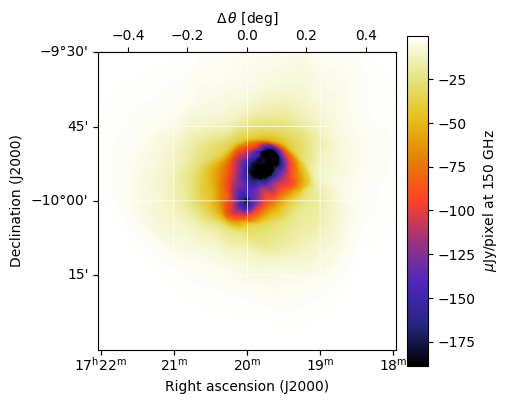

In [1]:
import maria
from maria.io import fetch

input_map = maria.map.load(fetch("maps/cluster2.fits"), nu=150e9)
input_map.data *= 2e1 

input_map.plot()
print(input_map)

PlanList(2 plans, 1200 s):
                           start_time duration   target(ra,dec)     center(az,el)
chunk                                                                            
0      2025-11-24 16:33:26.227 +00:00    600 s     (260°, -10°)  (49.68°, 70.94°)
1      2025-11-24 16:44:03.727 +00:00    600 s  (260°, -9.999°)   (43.5°, 72.72°)


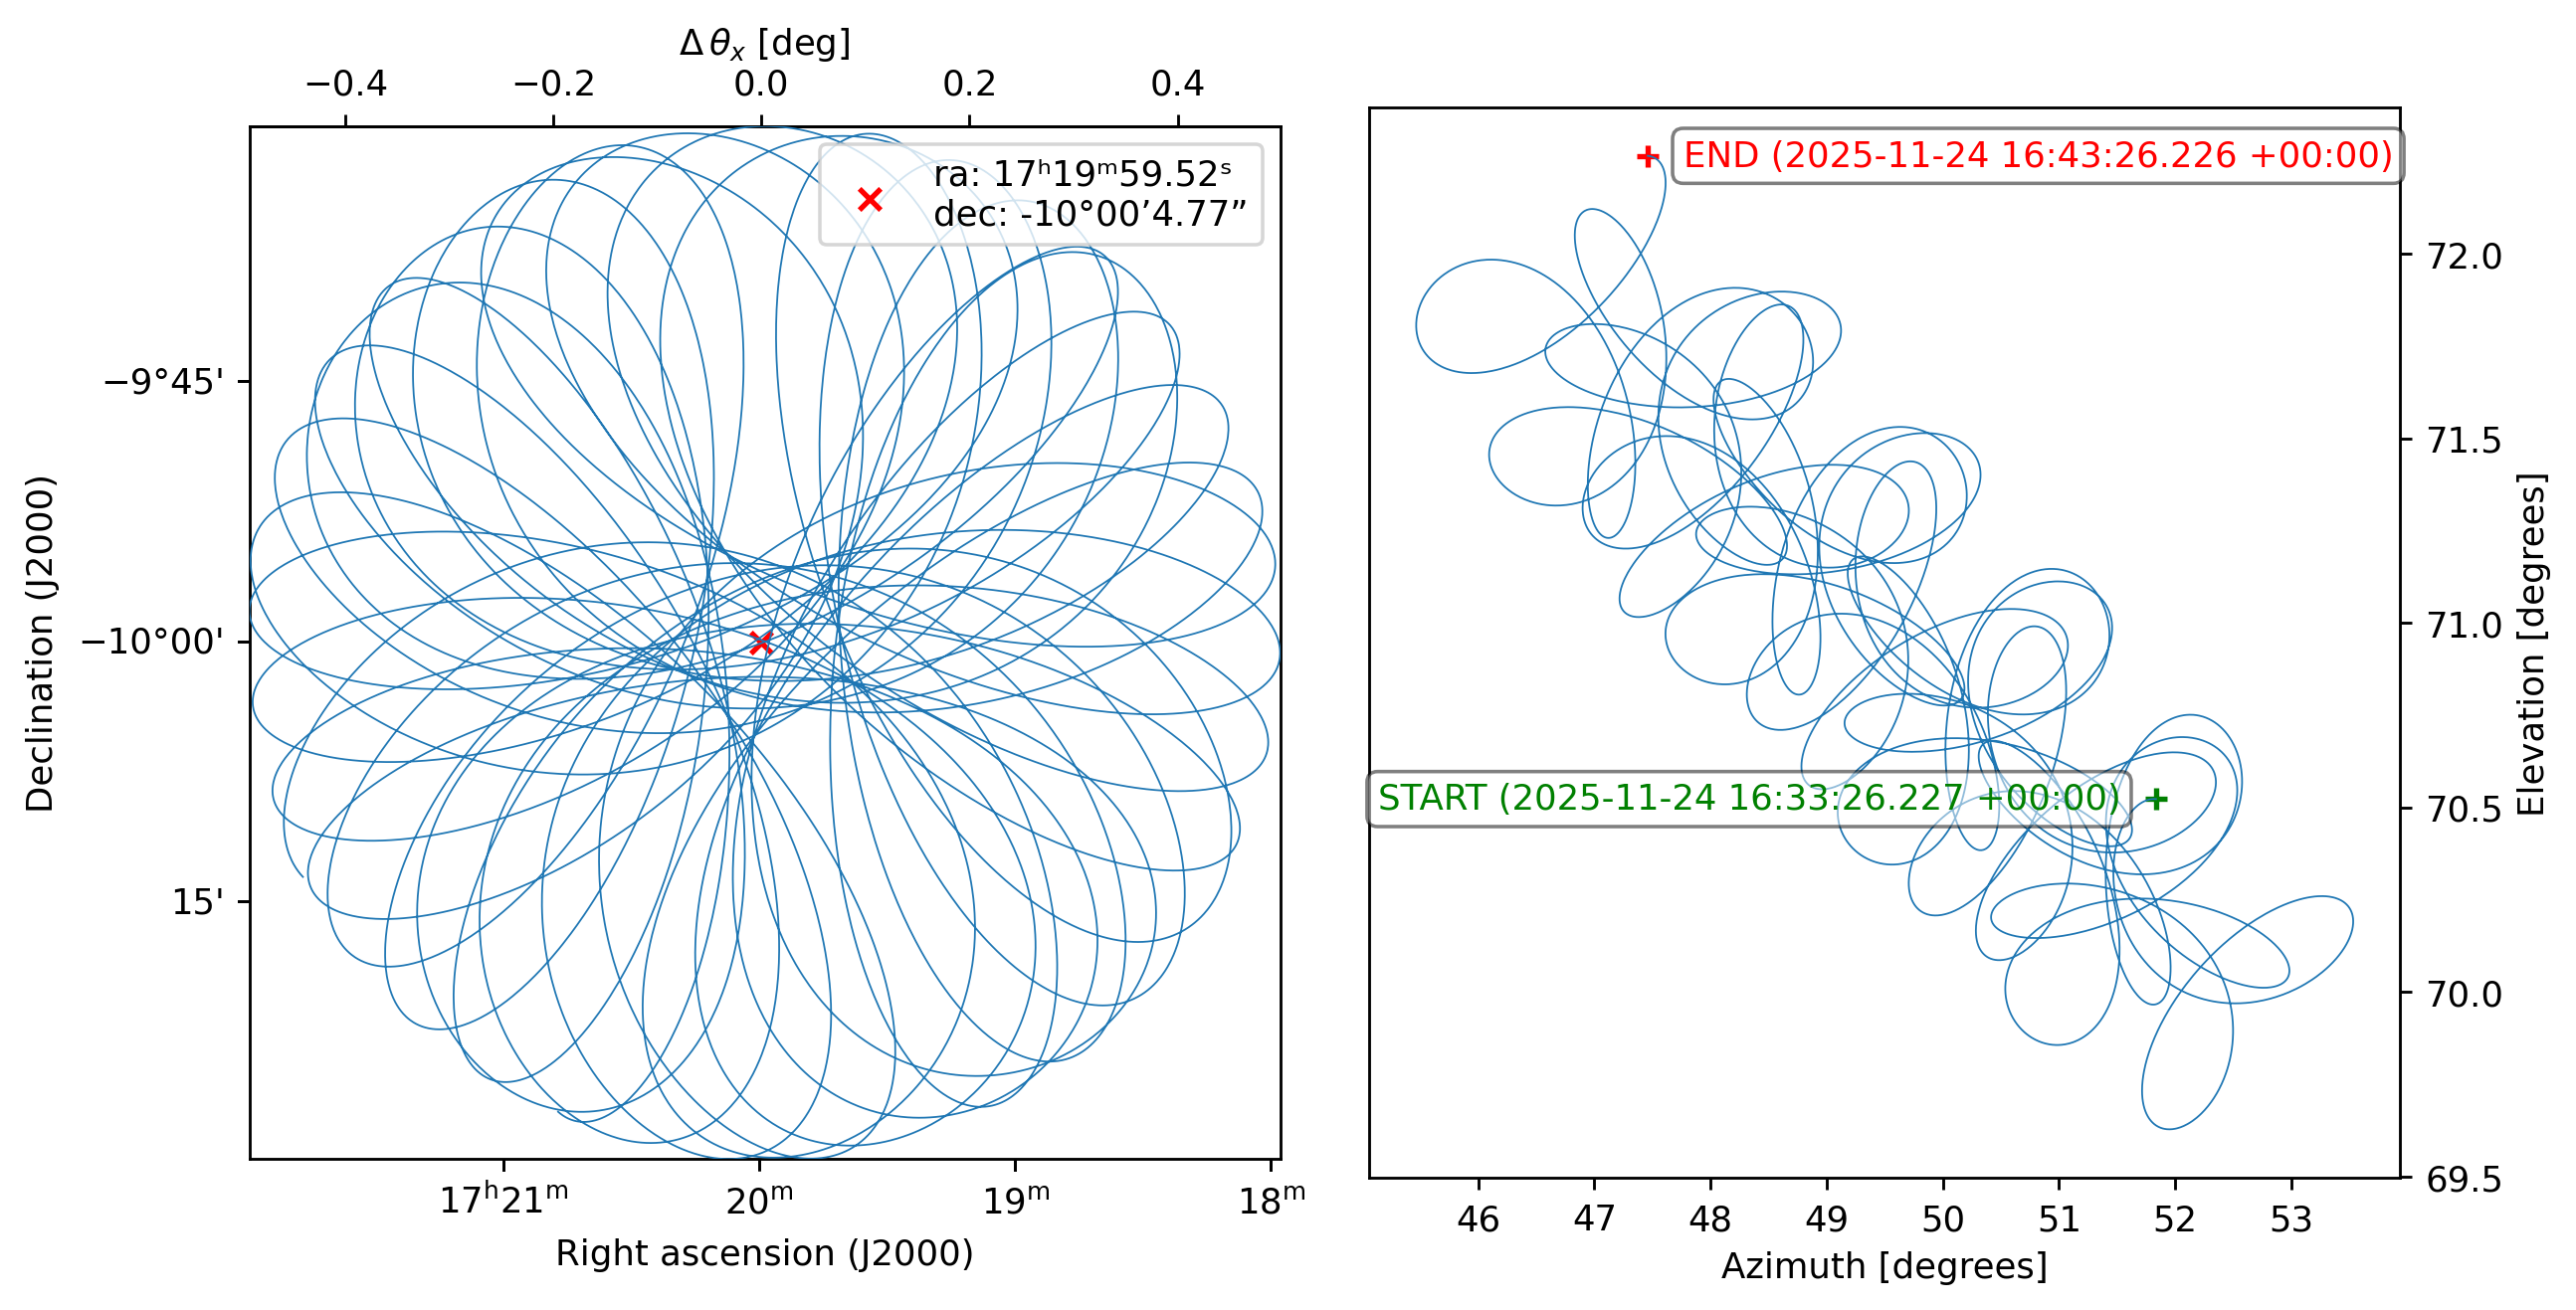

In [2]:
from maria import Planner

planner = Planner(target=input_map, site="cerro_toco", constraints={"el": (70, 90)})
plans = planner.generate_plans(total_duration=1200, 
                               max_chunk_duration=600, 
                               sample_rate=50,
                               scan_options={"radius": input_map.width.deg / 2})

plans[0].plot()
print(plans)

Instrument(1 array)
├ arrays:
│            n     FOV baseline   bands polarized
│  array1  678  5.953’      0 m  [f150]     False
│ 
└ bands:
      name   center   width    η         NEP      NET_RJ         NET_CMB   FWHM
   0  f150  150 GHz  30 GHz  0.5  6.125 aW√s  30 uK_RJ√s  52.02 uK_CMB√s  10.5”


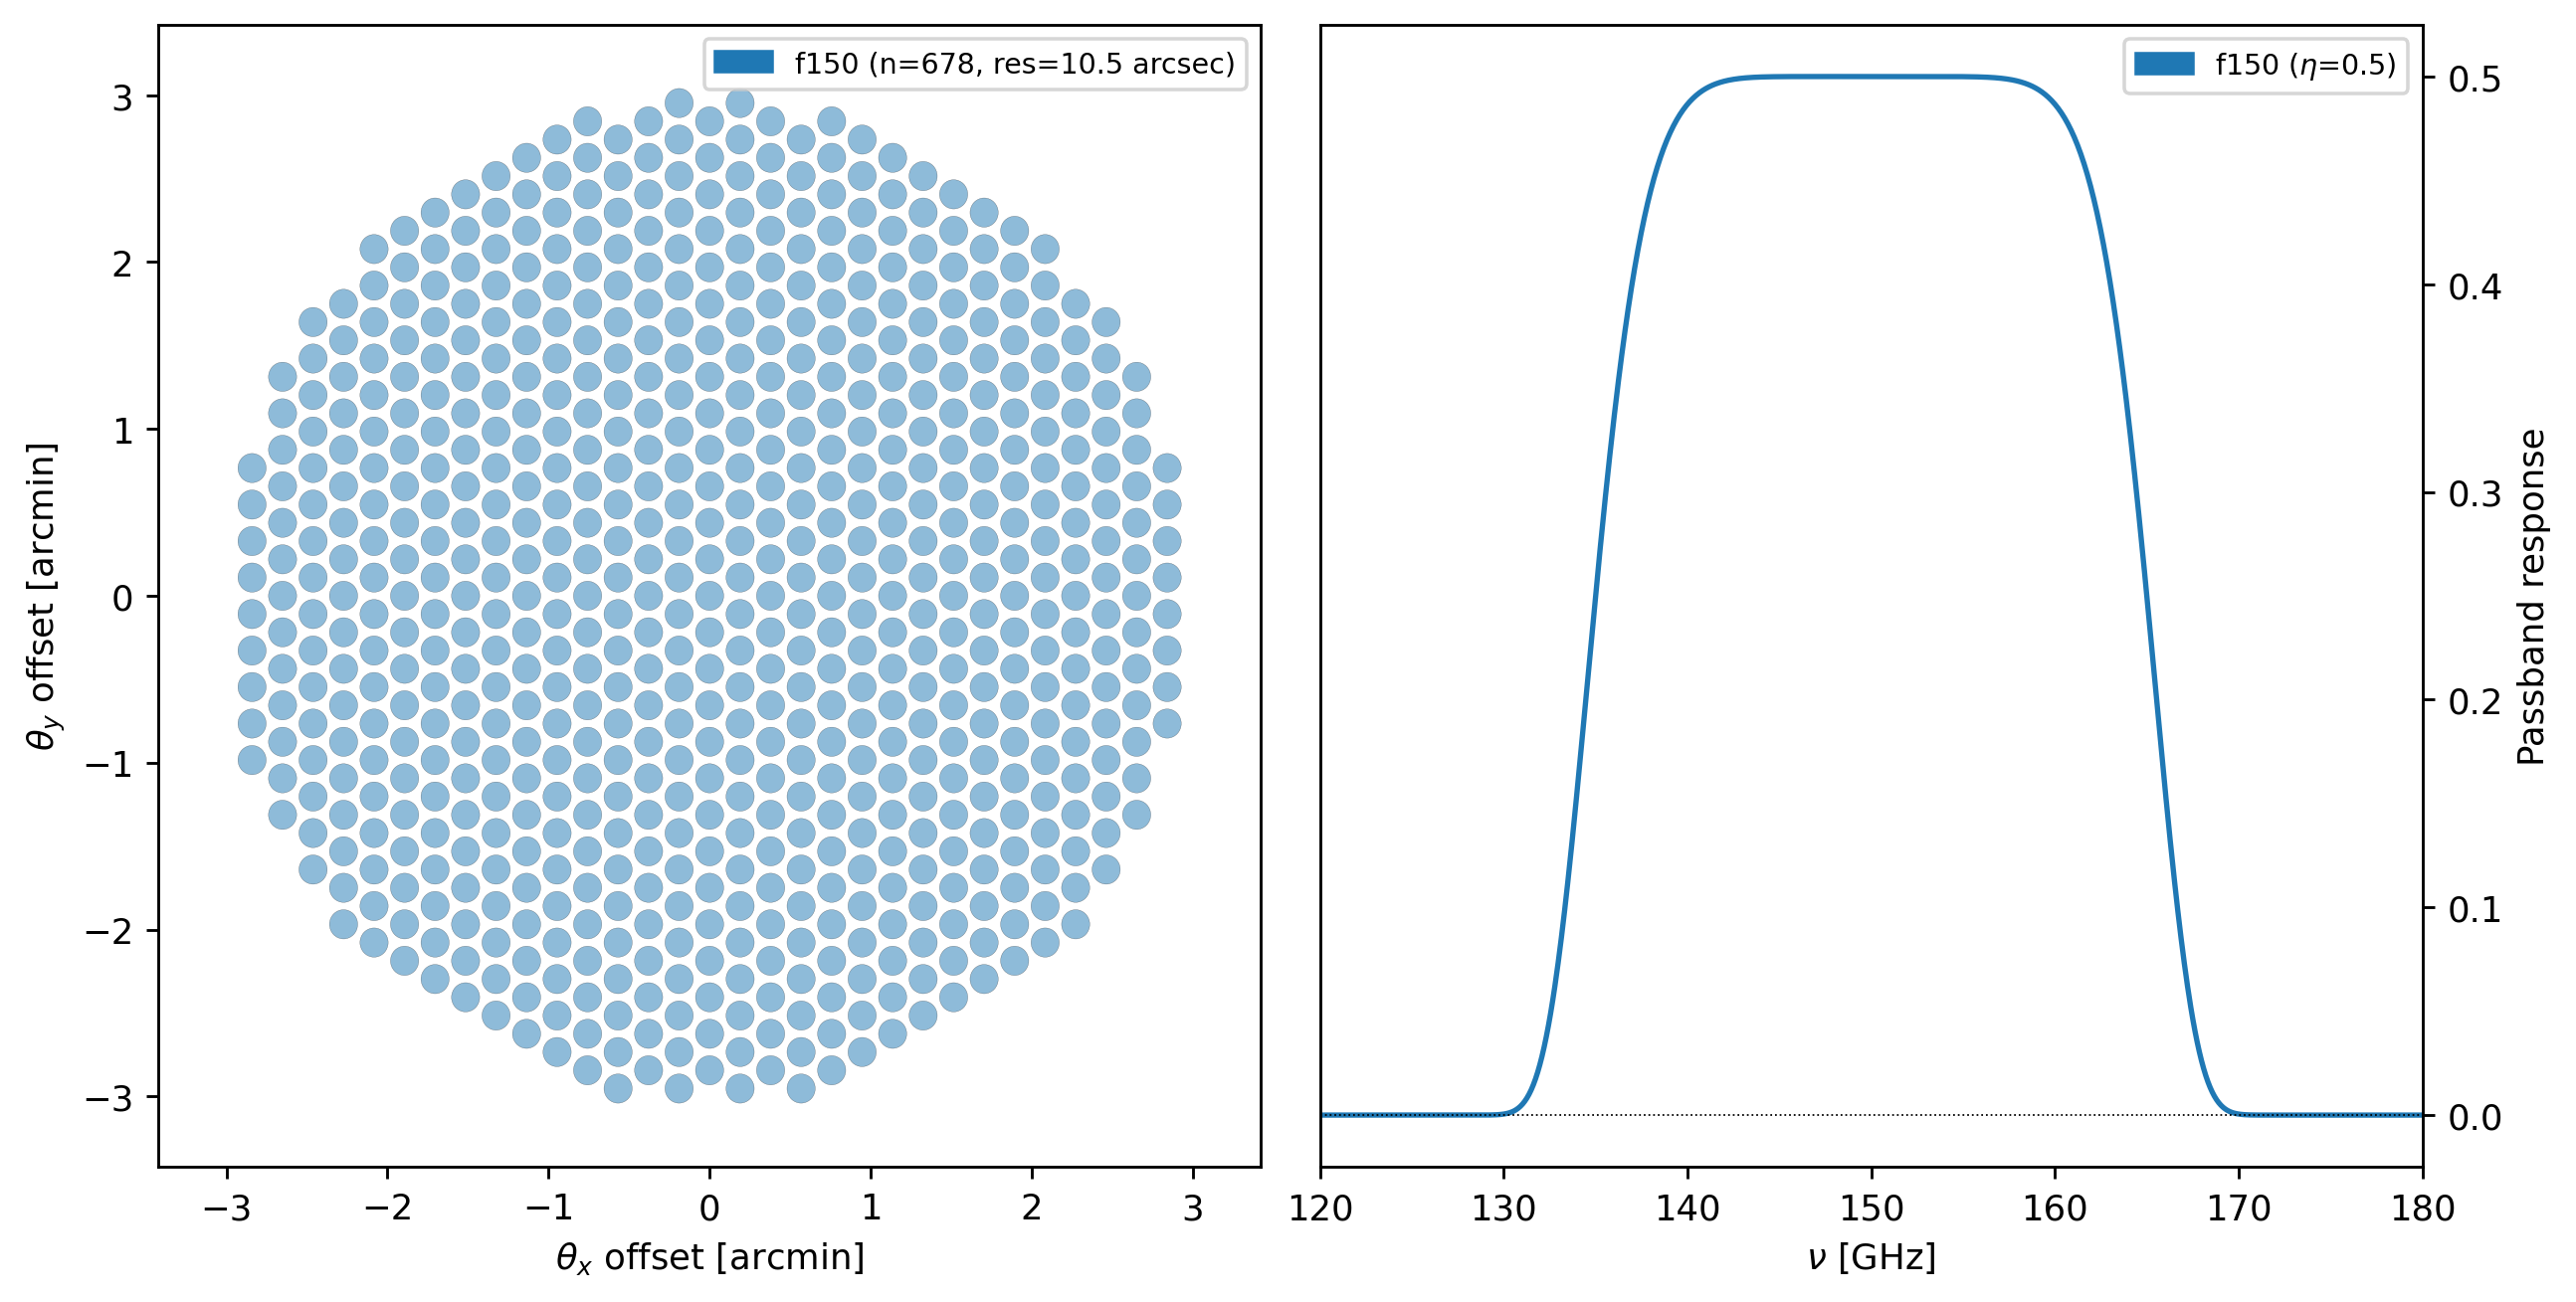

In [3]:
# import maria
from maria.instrument import Band

f150 = Band(
    center=150e9, 
    width=30e9, 
    NET_RJ=30e-6, 
    knee=1e0, 
    gain_error=2e-2)

array = {"field_of_view": 0.1, 
         "beam_spacing": 1.25,
         "primary_size": 50, 
         "shape": "circle",
         "bands": [f150]}

instrument = maria.get_instrument(array=array)

print(instrument)
instrument.plot()

In [4]:
sim = maria.Simulation(
    instrument,
    plans=plans,
    site="cerro_toco",
    map=input_map,
    atmosphere="2d",
    atmosphere_kwargs={"weather": {"pwv": 1.0}},
)

print(sim)

Simulation
├ Instrument(1 array)
│ ├ arrays:
│ │            n     FOV baseline   bands polarized
│ │  array1  678  5.953’      0 m  [f150]     False
│ │ 
│ └ bands:
│       name   center   width    η         NEP      NET_RJ         NET_CMB   FWHM
│    0  f150  150 GHz  30 GHz  0.5  6.125 aW√s  30 uK_RJ√s  52.02 uK_CMB√s  10.5”
├ Site:
│   region: chajnantor
│   timezone: America/Santiago
│   location:
│     longitude: 67°47’16.08” W
│     latitude:  22°57’30.96” S
│     altitude: 5190 m
│   seasonal: True
│   diurnal: True
├ PlanList(2 plans, 1200 s):
│                            start_time duration   target(ra,dec)     center(az,el)
│ chunk                                                                            
│ 0      2025-11-24 16:33:26.227 +00:00    600 s     (260°, -10°)  (49.68°, 70.94°)
│ 1      2025-11-24 16:44:03.727 +00:00    600 s  (260°, -9.999°)   (43.5°, 72.72°)
├ '2d'
└ ProjectionMap:
    shape(stokes, nu, t, y, x): (1, 1, 1, 1024, 1024)
    stokes: I
    nu: [150.]

2025-11-23 19:27:58.430 INFO: Simulating observation 1 of 2


Constructing atmosphere:   0%|                | 0/8 [00:00<?, ?it/s]

Constructing atmosphere:  12%|██              | 1/8 [00:00<00:04,  1.69it/s]

Constructing atmosphere:  25%|████            | 2/8 [00:01<00:03,  1.58it/s]

Constructing atmosphere:  38%|██████          | 3/8 [00:01<00:03,  1.62it/s]

Constructing atmosphere:  50%|████████        | 4/8 [00:02<00:02,  1.67it/s]

Constructing atmosphere:  62%|██████████      | 5/8 [00:03<00:01,  1.66it/s]

Constructing atmosphere:  75%|████████████    | 6/8 [00:03<00:01,  1.65it/s]

Constructing atmosphere:  88%|██████████████  | 7/8 [00:04<00:00,  1.61it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:04<00:00,  1.55it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:04<00:00,  1.60it/s]

Generating turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Generating turbulence:  50%|████████        | 4/8 [00:00<00:00, 34.25it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 20.98it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 22.22it/s]

Sampling turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Sampling turbulence:  12%|██              | 1/8 [00:01<00:09,  1.31s/it]

Sampling turbulence:  25%|████            | 2/8 [00:01<00:04,  1.24it/s]

Sampling turbulence:  38%|██████          | 3/8 [00:02<00:03,  1.55it/s]

Sampling turbulence:  50%|████████        | 4/8 [00:02<00:02,  1.76it/s]

Sampling turbulence:  62%|██████████      | 5/8 [00:03<00:01,  1.90it/s]

Sampling turbulence:  75%|████████████    | 6/8 [00:03<00:01,  1.99it/s]

Sampling turbulence:  88%|██████████████  | 7/8 [00:04<00:00,  2.05it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  2.09it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  1.78it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.10it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.10it/s, band=f150]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=, channel=, stokes=]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]               

Sampling map: 100%|████████████████| 1/1 [00:09<00:00,  9.52s/it, band=f150]

Sampling map: 100%|████████████████| 1/1 [00:09<00:00,  9.52s/it, band=f150]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.11it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.11it/s, band=f150]

2025-11-23 19:28:33.828 INFO: Simulated observation 1 of 2 in 35.39 s


2025-11-23 19:28:33.829 INFO: Simulating observation 2 of 2


Constructing atmosphere:   0%|                | 0/8 [00:00<?, ?it/s]

Constructing atmosphere:  12%|██              | 1/8 [00:00<00:04,  1.52it/s]

Constructing atmosphere:  25%|████            | 2/8 [00:01<00:04,  1.47it/s]

Constructing atmosphere:  38%|██████          | 3/8 [00:01<00:03,  1.54it/s]

Constructing atmosphere:  50%|████████        | 4/8 [00:02<00:02,  1.54it/s]

Constructing atmosphere:  62%|██████████      | 5/8 [00:03<00:01,  1.53it/s]

Constructing atmosphere:  75%|████████████    | 6/8 [00:03<00:01,  1.58it/s]

Constructing atmosphere:  88%|██████████████  | 7/8 [00:04<00:00,  1.54it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:05<00:00,  1.56it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:05<00:00,  1.55it/s]

Generating turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Generating turbulence:  50%|████████        | 4/8 [00:00<00:00, 33.91it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 20.83it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 22.07it/s]

Sampling turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Sampling turbulence:  12%|██              | 1/8 [00:01<00:08,  1.26s/it]

Sampling turbulence:  25%|████            | 2/8 [00:01<00:04,  1.30it/s]

Sampling turbulence:  38%|██████          | 3/8 [00:02<00:03,  1.64it/s]

Sampling turbulence:  50%|████████        | 4/8 [00:02<00:02,  1.87it/s]

Sampling turbulence:  62%|██████████      | 5/8 [00:02<00:01,  2.02it/s]

Sampling turbulence:  75%|████████████    | 6/8 [00:03<00:00,  2.14it/s]

Sampling turbulence:  88%|██████████████  | 7/8 [00:03<00:00,  1.93it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  1.99it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  1.79it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.44it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.44it/s, band=f150]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=, channel=, stokes=]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]               

Sampling map: 100%|████████████████| 1/1 [00:08<00:00,  8.72s/it, band=f150]

Sampling map: 100%|████████████████| 1/1 [00:08<00:00,  8.72s/it, band=f150]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.70it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.70it/s, band=f150]

2025-11-23 19:29:08.448 INFO: Simulated observation 2 of 2 in 34.61 s


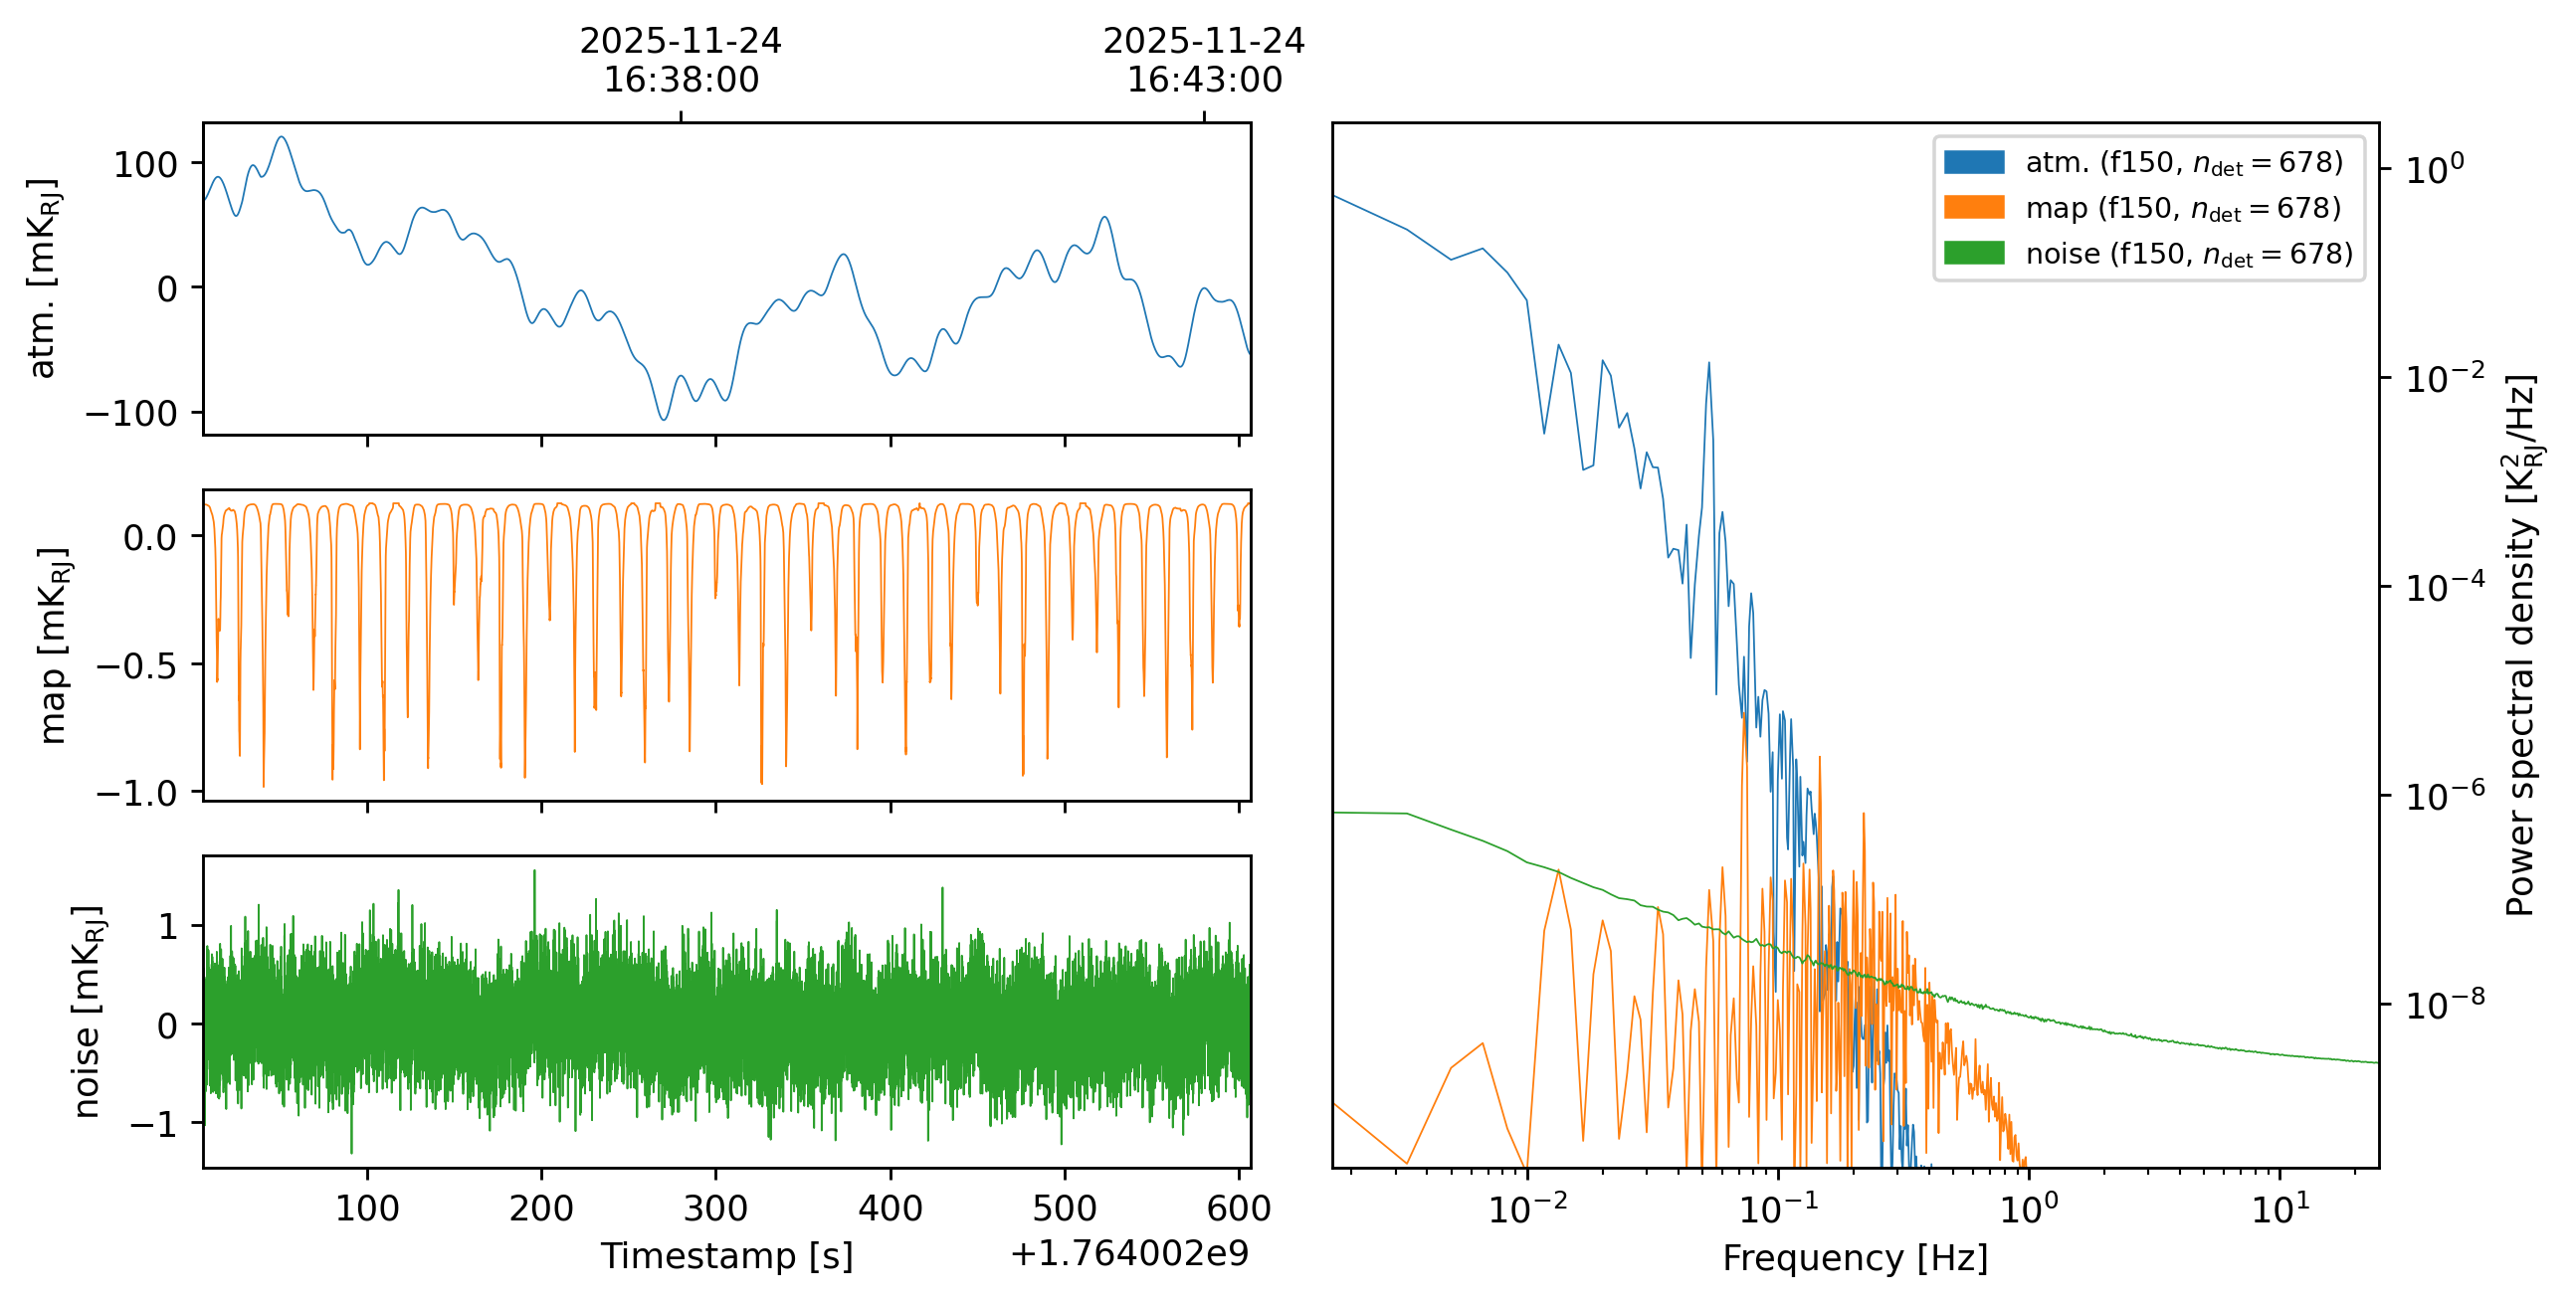

In [5]:
tods = sim.run()
tods[0].plot()

In [6]:
from maria.mappers import MaximumLikelihoodMapper

ml_mapper = MaximumLikelihoodMapper(frame="ra/dec",
                                    width=0.8 * input_map.width.deg,
                                    height=0.8 * input_map.height.deg,
                                    tods=tods, 
                                    units="mK_RJ")


2025-11-23 19:29:18.811 INFO: Inferring center {'ra': '17ʰ19ᵐ59.39ˢ', 'dec': '-9°59’59.07”'} for mapper.


2025-11-23 19:29:18.824 INFO: Inferring mapper resolution 0.375’ for mapper from observation patch.


2025-11-23 19:29:18.826 INFO: Inferring mapper stokes parameters 'I' for mapper.


Preprocessing TODs:   0%|                | 0/2 [00:00<?, ?it/s]

Preprocessing TODs:  50%|████████        | 1/2 [00:01<00:01,  1.07s/it]

Preprocessing TODs: 100%|████████████████| 2/2 [00:02<00:00,  1.07s/it]

Preprocessing TODs: 100%|████████████████| 2/2 [00:02<00:00,  1.07s/it]

Mapping:   0%|          | 0/2 [00:00<?, ?it/s, tod=1/2]

Mapping:  50%|█████     | 1/2 [00:02<00:02,  2.35s/it, tod=1/2]

Mapping: 100%|██████████| 2/2 [00:04<00:00,  2.35s/it, tod=1/2]

Mapping: 100%|██████████| 2/2 [00:04<00:00,  2.35s/it, tod=1/2]

Computing noise model: 0it [00:00, ?it/s]

Computing noise model: 0it [00:00, ?it/s, tod=1/2]

Computing noise model: 1it [00:03,  3.67s/it, tod=1/2]

Computing noise model: 1it [00:03,  3.67s/it, tod=2/2]

Computing noise model: 2it [00:07,  3.85s/it, tod=2/2]

Computing noise model: 2it [00:07,  3.82s/it, tod=2/2]

The initial map is a "guess" constructing by heavily filtering the input TODs:

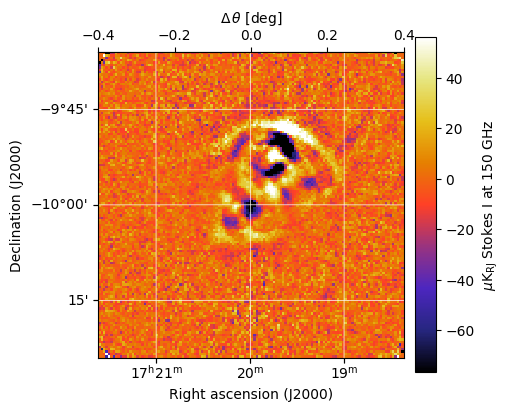

In [7]:
ml_mapper.map.plot()

To fit the map we run

In [8]:
ml_mapper.fit(epochs=4, steps_per_epoch=32, lr=1e0)

epoch 1/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 1/4:   0%|                | 0/32 [00:05<?, ?it/s, loss=5.136e+00]

epoch 1/4:   3%|▌               | 1/32 [00:05<03:01,  5.86s/it, loss=5.136e+00]

epoch 1/4:   3%|▌               | 1/32 [00:11<03:01,  5.86s/it, loss=5.124e+00]

epoch 1/4:   6%|█               | 2/32 [00:11<02:56,  5.88s/it, loss=5.124e+00]

epoch 1/4:   6%|█               | 2/32 [00:17<02:56,  5.88s/it, loss=5.086e+00]

epoch 1/4:   9%|█▌              | 3/32 [00:17<02:50,  5.89s/it, loss=5.086e+00]

epoch 1/4:   9%|█▌              | 3/32 [00:23<02:50,  5.89s/it, loss=4.990e+00]

epoch 1/4:  12%|██              | 4/32 [00:23<02:45,  5.91s/it, loss=4.990e+00]

epoch 1/4:  12%|██              | 4/32 [00:29<02:45,  5.91s/it, loss=4.770e+00]

epoch 1/4:  16%|██▌             | 5/32 [00:29<02:39,  5.89s/it, loss=4.770e+00]

epoch 1/4:  16%|██▌             | 5/32 [00:35<02:39,  5.89s/it, loss=4.363e+00]

epoch 1/4:  19%|███             | 6/32 [00:35<02:32,  5.88s/it, loss=4.363e+00]

epoch 1/4:  19%|███             | 6/32 [00:41<02:32,  5.88s/it, loss=4.100e+00]

epoch 1/4:  22%|███▌            | 7/32 [00:41<02:26,  5.88s/it, loss=4.100e+00]

epoch 1/4:  22%|███▌            | 7/32 [00:47<02:26,  5.88s/it, loss=4.060e+00]

epoch 1/4:  25%|████            | 8/32 [00:47<02:20,  5.87s/it, loss=4.060e+00]

epoch 1/4:  25%|████            | 8/32 [00:52<02:20,  5.87s/it, loss=3.747e+00]

epoch 1/4:  28%|████▌           | 9/32 [00:52<02:14,  5.87s/it, loss=3.747e+00]

epoch 1/4:  28%|████▌           | 9/32 [00:58<02:14,  5.87s/it, loss=3.722e+00]

epoch 1/4:  31%|█████           | 10/32 [00:58<02:08,  5.86s/it, loss=3.722e+00]

epoch 1/4:  31%|█████           | 10/32 [01:04<02:08,  5.86s/it, loss=3.582e+00]

epoch 1/4:  34%|█████▌          | 11/32 [01:04<02:03,  5.86s/it, loss=3.582e+00]

epoch 1/4:  34%|█████▌          | 11/32 [01:10<02:03,  5.86s/it, loss=3.316e+00]

epoch 1/4:  38%|██████          | 12/32 [01:10<01:57,  5.86s/it, loss=3.316e+00]

epoch 1/4:  38%|██████          | 12/32 [01:16<01:57,  5.86s/it, loss=3.189e+00]

epoch 1/4:  41%|██████▌         | 13/32 [01:16<01:51,  5.85s/it, loss=3.189e+00]

epoch 1/4:  41%|██████▌         | 13/32 [01:22<01:51,  5.85s/it, loss=3.100e+00]

epoch 1/4:  44%|███████         | 14/32 [01:22<01:45,  5.85s/it, loss=3.100e+00]

epoch 1/4:  44%|███████         | 14/32 [01:27<01:45,  5.85s/it, loss=2.826e+00]

epoch 1/4:  47%|███████▌        | 15/32 [01:27<01:39,  5.84s/it, loss=2.826e+00]

epoch 1/4:  47%|███████▌        | 15/32 [01:33<01:39,  5.84s/it, loss=2.756e+00]

epoch 1/4:  50%|████████        | 16/32 [01:33<01:33,  5.85s/it, loss=2.756e+00]

epoch 1/4:  50%|████████        | 16/32 [01:39<01:33,  5.85s/it, loss=2.622e+00]

epoch 1/4:  53%|████████▌       | 17/32 [01:39<01:27,  5.85s/it, loss=2.622e+00]

epoch 1/4:  53%|████████▌       | 17/32 [01:45<01:27,  5.85s/it, loss=2.411e+00]

epoch 1/4:  56%|█████████       | 18/32 [01:45<01:21,  5.85s/it, loss=2.411e+00]

epoch 1/4:  56%|█████████       | 18/32 [01:51<01:21,  5.85s/it, loss=2.331e+00]

epoch 1/4:  59%|█████████▌      | 19/32 [01:51<01:16,  5.86s/it, loss=2.331e+00]

epoch 1/4:  59%|█████████▌      | 19/32 [01:57<01:16,  5.86s/it, loss=2.143e+00]

epoch 1/4:  62%|██████████      | 20/32 [01:57<01:10,  5.85s/it, loss=2.143e+00]

epoch 1/4:  62%|██████████      | 20/32 [02:03<01:10,  5.85s/it, loss=1.989e+00]

epoch 1/4:  66%|██████████▌     | 21/32 [02:03<01:04,  5.84s/it, loss=1.989e+00]

epoch 1/4:  66%|██████████▌     | 21/32 [02:08<01:04,  5.84s/it, loss=1.926e+00]

epoch 1/4:  69%|███████████     | 22/32 [02:08<00:58,  5.84s/it, loss=1.926e+00]

epoch 1/4:  69%|███████████     | 22/32 [02:14<00:58,  5.84s/it, loss=1.807e+00]

epoch 1/4:  72%|███████████▌    | 23/32 [02:14<00:52,  5.84s/it, loss=1.807e+00]

epoch 1/4:  72%|███████████▌    | 23/32 [02:20<00:52,  5.84s/it, loss=1.736e+00]

epoch 1/4:  75%|████████████    | 24/32 [02:20<00:46,  5.84s/it, loss=1.736e+00]

epoch 1/4:  75%|████████████    | 24/32 [02:26<00:46,  5.84s/it, loss=1.643e+00]

epoch 1/4:  78%|████████████▌   | 25/32 [02:26<00:40,  5.84s/it, loss=1.643e+00]

epoch 1/4:  78%|████████████▌   | 25/32 [02:32<00:40,  5.84s/it, loss=1.532e+00]

epoch 1/4:  81%|█████████████   | 26/32 [02:32<00:35,  5.84s/it, loss=1.532e+00]

epoch 1/4:  81%|█████████████   | 26/32 [02:38<00:35,  5.84s/it, loss=1.484e+00]

epoch 1/4:  84%|█████████████▌  | 27/32 [02:38<00:29,  5.84s/it, loss=1.484e+00]

epoch 1/4:  84%|█████████████▌  | 27/32 [02:43<00:29,  5.84s/it, loss=1.406e+00]

epoch 1/4:  88%|██████████████  | 28/32 [02:43<00:23,  5.85s/it, loss=1.406e+00]

epoch 1/4:  88%|██████████████  | 28/32 [02:49<00:23,  5.85s/it, loss=1.359e+00]

epoch 1/4:  91%|██████████████▌ | 29/32 [02:49<00:17,  5.86s/it, loss=1.359e+00]

epoch 1/4:  91%|██████████████▌ | 29/32 [02:55<00:17,  5.86s/it, loss=1.288e+00]

epoch 1/4:  94%|███████████████ | 30/32 [02:55<00:11,  5.87s/it, loss=1.288e+00]

epoch 1/4:  94%|███████████████ | 30/32 [03:01<00:11,  5.87s/it, loss=1.226e+00]

epoch 1/4:  97%|███████████████▌| 31/32 [03:01<00:05,  5.87s/it, loss=1.226e+00]

epoch 1/4:  97%|███████████████▌| 31/32 [03:07<00:05,  5.87s/it, loss=1.190e+00]

epoch 1/4: 100%|████████████████| 32/32 [03:07<00:00,  5.87s/it, loss=1.190e+00]

epoch 1/4: 100%|████████████████| 32/32 [03:07<00:00,  5.86s/it, loss=1.190e+00]

epoch 2/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 2/4:   0%|                | 0/32 [00:05<?, ?it/s, loss=1.143e+00]

epoch 2/4:   3%|▌               | 1/32 [00:05<03:01,  5.87s/it, loss=1.143e+00]

epoch 2/4:   3%|▌               | 1/32 [00:11<03:01,  5.87s/it, loss=1.121e+00]

epoch 2/4:   6%|█               | 2/32 [00:11<02:55,  5.86s/it, loss=1.121e+00]

epoch 2/4:   6%|█               | 2/32 [00:17<02:55,  5.86s/it, loss=1.076e+00]

epoch 2/4:   9%|█▌              | 3/32 [00:17<02:50,  5.88s/it, loss=1.076e+00]

epoch 2/4:   9%|█▌              | 3/32 [00:23<02:50,  5.88s/it, loss=1.055e+00]

epoch 2/4:  12%|██              | 4/32 [00:23<02:44,  5.88s/it, loss=1.055e+00]

epoch 2/4:  12%|██              | 4/32 [00:29<02:44,  5.88s/it, loss=1.025e+00]

epoch 2/4:  16%|██▌             | 5/32 [00:29<02:38,  5.88s/it, loss=1.025e+00]

epoch 2/4:  16%|██▌             | 5/32 [00:35<02:38,  5.88s/it, loss=1.002e+00]

epoch 2/4:  19%|███             | 6/32 [00:35<02:32,  5.88s/it, loss=1.002e+00]

epoch 2/4:  19%|███             | 6/32 [00:41<02:32,  5.88s/it, loss=9.746e-01]

epoch 2/4:  22%|███▌            | 7/32 [00:41<02:26,  5.87s/it, loss=9.746e-01]

epoch 2/4:  22%|███▌            | 7/32 [00:46<02:26,  5.87s/it, loss=9.469e-01]

epoch 2/4:  25%|████            | 8/32 [00:46<02:20,  5.87s/it, loss=9.469e-01]

epoch 2/4:  25%|████            | 8/32 [00:52<02:20,  5.87s/it, loss=9.255e-01]

epoch 2/4:  28%|████▌           | 9/32 [00:52<02:14,  5.86s/it, loss=9.255e-01]

epoch 2/4:  28%|████▌           | 9/32 [00:58<02:14,  5.86s/it, loss=9.003e-01]

epoch 2/4:  31%|█████           | 10/32 [00:58<02:08,  5.86s/it, loss=9.003e-01]

epoch 2/4:  31%|█████           | 10/32 [01:04<02:08,  5.86s/it, loss=8.815e-01]

epoch 2/4:  34%|█████▌          | 11/32 [01:04<02:02,  5.86s/it, loss=8.815e-01]

epoch 2/4:  34%|█████▌          | 11/32 [01:10<02:02,  5.86s/it, loss=8.561e-01]

epoch 2/4:  38%|██████          | 12/32 [01:10<01:56,  5.85s/it, loss=8.561e-01]

epoch 2/4:  38%|██████          | 12/32 [01:16<01:56,  5.85s/it, loss=8.405e-01]

epoch 2/4:  41%|██████▌         | 13/32 [01:16<01:51,  5.85s/it, loss=8.405e-01]

epoch 2/4:  41%|██████▌         | 13/32 [01:22<01:51,  5.85s/it, loss=8.208e-01]

epoch 2/4:  44%|███████         | 14/32 [01:22<01:45,  5.85s/it, loss=8.208e-01]

epoch 2/4:  44%|███████         | 14/32 [01:27<01:45,  5.85s/it, loss=8.083e-01]

epoch 2/4:  47%|███████▌        | 15/32 [01:27<01:39,  5.85s/it, loss=8.083e-01]

epoch 2/4:  47%|███████▌        | 15/32 [01:33<01:39,  5.85s/it, loss=7.903e-01]

epoch 2/4:  50%|████████        | 16/32 [01:33<01:33,  5.85s/it, loss=7.903e-01]

epoch 2/4:  50%|████████        | 16/32 [01:39<01:33,  5.85s/it, loss=7.795e-01]

epoch 2/4:  53%|████████▌       | 17/32 [01:39<01:27,  5.86s/it, loss=7.795e-01]

epoch 2/4:  53%|████████▌       | 17/32 [01:45<01:27,  5.86s/it, loss=7.654e-01]

epoch 2/4:  56%|█████████       | 18/32 [01:45<01:22,  5.86s/it, loss=7.654e-01]

epoch 2/4:  56%|█████████       | 18/32 [01:51<01:22,  5.86s/it, loss=7.562e-01]

epoch 2/4:  59%|█████████▌      | 19/32 [01:51<01:16,  5.86s/it, loss=7.562e-01]

epoch 2/4:  59%|█████████▌      | 19/32 [01:57<01:16,  5.86s/it, loss=7.429e-01]

epoch 2/4:  62%|██████████      | 20/32 [01:57<01:10,  5.86s/it, loss=7.429e-01]

epoch 2/4:  62%|██████████      | 20/32 [02:03<01:10,  5.86s/it, loss=7.341e-01]

epoch 2/4:  66%|██████████▌     | 21/32 [02:03<01:04,  5.87s/it, loss=7.341e-01]

epoch 2/4:  66%|██████████▌     | 21/32 [02:08<01:04,  5.87s/it, loss=7.228e-01]

epoch 2/4:  69%|███████████     | 22/32 [02:08<00:58,  5.86s/it, loss=7.228e-01]

epoch 2/4:  69%|███████████     | 22/32 [02:14<00:58,  5.86s/it, loss=7.145e-01]

epoch 2/4:  72%|███████████▌    | 23/32 [02:14<00:52,  5.86s/it, loss=7.145e-01]

epoch 2/4:  72%|███████████▌    | 23/32 [02:20<00:52,  5.86s/it, loss=7.039e-01]

epoch 2/4:  75%|████████████    | 24/32 [02:20<00:46,  5.86s/it, loss=7.039e-01]

epoch 2/4:  75%|████████████    | 24/32 [02:26<00:46,  5.86s/it, loss=6.958e-01]

epoch 2/4:  78%|████████████▌   | 25/32 [02:26<00:41,  5.87s/it, loss=6.958e-01]

epoch 2/4:  78%|████████████▌   | 25/32 [02:32<00:41,  5.87s/it, loss=6.869e-01]

epoch 2/4:  81%|█████████████   | 26/32 [02:32<00:35,  5.87s/it, loss=6.869e-01]

epoch 2/4:  81%|█████████████   | 26/32 [02:38<00:35,  5.87s/it, loss=6.792e-01]

epoch 2/4:  84%|█████████████▌  | 27/32 [02:38<00:29,  5.88s/it, loss=6.792e-01]

epoch 2/4:  84%|█████████████▌  | 27/32 [02:44<00:29,  5.88s/it, loss=6.715e-01]

epoch 2/4:  88%|██████████████  | 28/32 [02:44<00:23,  5.87s/it, loss=6.715e-01]

epoch 2/4:  88%|██████████████  | 28/32 [02:50<00:23,  5.87s/it, loss=6.644e-01]

epoch 2/4:  91%|██████████████▌ | 29/32 [02:50<00:17,  5.87s/it, loss=6.644e-01]

epoch 2/4:  91%|██████████████▌ | 29/32 [02:55<00:17,  5.87s/it, loss=6.581e-01]

epoch 2/4:  94%|███████████████ | 30/32 [02:55<00:11,  5.87s/it, loss=6.581e-01]

epoch 2/4:  94%|███████████████ | 30/32 [03:01<00:11,  5.87s/it, loss=6.513e-01]

epoch 2/4:  97%|███████████████▌| 31/32 [03:01<00:05,  5.86s/it, loss=6.513e-01]

epoch 2/4:  97%|███████████████▌| 31/32 [03:07<00:05,  5.86s/it, loss=6.459e-01]

epoch 2/4: 100%|████████████████| 32/32 [03:07<00:00,  5.86s/it, loss=6.459e-01]

epoch 2/4: 100%|████████████████| 32/32 [03:07<00:00,  5.86s/it, loss=6.459e-01]

epoch 3/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 3/4:   0%|                | 0/32 [00:05<?, ?it/s, loss=6.400e-01]

epoch 3/4:   3%|▌               | 1/32 [00:05<03:01,  5.86s/it, loss=6.400e-01]

epoch 3/4:   3%|▌               | 1/32 [00:11<03:01,  5.86s/it, loss=6.355e-01]

epoch 3/4:   6%|█               | 2/32 [00:11<02:56,  5.87s/it, loss=6.355e-01]

epoch 3/4:   6%|█               | 2/32 [00:17<02:56,  5.87s/it, loss=6.303e-01]

epoch 3/4:   9%|█▌              | 3/32 [00:17<02:49,  5.86s/it, loss=6.303e-01]

epoch 3/4:   9%|█▌              | 3/32 [00:23<02:49,  5.86s/it, loss=6.261e-01]

epoch 3/4:  12%|██              | 4/32 [00:23<02:43,  5.86s/it, loss=6.261e-01]

epoch 3/4:  12%|██              | 4/32 [00:29<02:43,  5.86s/it, loss=6.219e-01]

epoch 3/4:  16%|██▌             | 5/32 [00:29<02:38,  5.86s/it, loss=6.219e-01]

epoch 3/4:  16%|██▌             | 5/32 [00:35<02:38,  5.86s/it, loss=6.178e-01]

epoch 3/4:  19%|███             | 6/32 [00:35<02:32,  5.86s/it, loss=6.178e-01]

epoch 3/4:  19%|███             | 6/32 [00:41<02:32,  5.86s/it, loss=6.142e-01]

epoch 3/4:  22%|███▌            | 7/32 [00:41<02:26,  5.86s/it, loss=6.142e-01]

epoch 3/4:  22%|███▌            | 7/32 [00:46<02:26,  5.86s/it, loss=6.104e-01]

epoch 3/4:  25%|████            | 8/32 [00:46<02:20,  5.87s/it, loss=6.104e-01]

epoch 3/4:  25%|████            | 8/32 [00:52<02:20,  5.87s/it, loss=6.072e-01]

epoch 3/4:  28%|████▌           | 9/32 [00:52<02:15,  5.88s/it, loss=6.072e-01]

epoch 3/4:  28%|████▌           | 9/32 [00:58<02:15,  5.88s/it, loss=6.037e-01]

epoch 3/4:  31%|█████           | 10/32 [00:58<02:09,  5.88s/it, loss=6.037e-01]

epoch 3/4:  31%|█████           | 10/32 [01:04<02:09,  5.88s/it, loss=6.006e-01]

epoch 3/4:  34%|█████▌          | 11/32 [01:04<02:03,  5.89s/it, loss=6.006e-01]

epoch 3/4:  34%|█████▌          | 11/32 [01:10<02:03,  5.89s/it, loss=5.977e-01]

epoch 3/4:  38%|██████          | 12/32 [01:10<01:57,  5.88s/it, loss=5.977e-01]

epoch 3/4:  38%|██████          | 12/32 [01:16<01:57,  5.88s/it, loss=5.947e-01]

epoch 3/4:  41%|██████▌         | 13/32 [01:16<01:51,  5.88s/it, loss=5.947e-01]

epoch 3/4:  41%|██████▌         | 13/32 [01:22<01:51,  5.88s/it, loss=5.921e-01]

epoch 3/4:  44%|███████         | 14/32 [01:22<01:45,  5.88s/it, loss=5.921e-01]

epoch 3/4:  44%|███████         | 14/32 [01:28<01:45,  5.88s/it, loss=5.893e-01]

epoch 3/4:  47%|███████▌        | 15/32 [01:28<01:39,  5.87s/it, loss=5.893e-01]

epoch 3/4:  47%|███████▌        | 15/32 [01:33<01:39,  5.87s/it, loss=5.868e-01]

epoch 3/4:  50%|████████        | 16/32 [01:33<01:33,  5.86s/it, loss=5.868e-01]

epoch 3/4:  50%|████████        | 16/32 [01:39<01:33,  5.86s/it, loss=5.843e-01]

epoch 3/4:  53%|████████▌       | 17/32 [01:39<01:27,  5.85s/it, loss=5.843e-01]

epoch 3/4:  53%|████████▌       | 17/32 [01:45<01:27,  5.85s/it, loss=5.818e-01]

epoch 3/4:  56%|█████████       | 18/32 [01:45<01:21,  5.85s/it, loss=5.818e-01]

epoch 3/4:  56%|█████████       | 18/32 [01:51<01:21,  5.85s/it, loss=5.796e-01]

epoch 3/4:  59%|█████████▌      | 19/32 [01:51<01:15,  5.84s/it, loss=5.796e-01]

epoch 3/4:  59%|█████████▌      | 19/32 [01:57<01:15,  5.84s/it, loss=5.772e-01]

epoch 3/4:  62%|██████████      | 20/32 [01:57<01:10,  5.85s/it, loss=5.772e-01]

epoch 3/4:  62%|██████████      | 20/32 [02:03<01:10,  5.85s/it, loss=5.750e-01]

epoch 3/4:  66%|██████████▌     | 21/32 [02:03<01:04,  5.84s/it, loss=5.750e-01]

epoch 3/4:  66%|██████████▌     | 21/32 [02:08<01:04,  5.84s/it, loss=5.730e-01]

epoch 3/4:  69%|███████████     | 22/32 [02:08<00:58,  5.85s/it, loss=5.730e-01]

epoch 3/4:  69%|███████████     | 22/32 [02:14<00:58,  5.85s/it, loss=5.709e-01]

epoch 3/4:  72%|███████████▌    | 23/32 [02:14<00:52,  5.85s/it, loss=5.709e-01]

epoch 3/4:  72%|███████████▌    | 23/32 [02:20<00:52,  5.85s/it, loss=5.689e-01]

epoch 3/4:  75%|████████████    | 24/32 [02:20<00:46,  5.84s/it, loss=5.689e-01]

epoch 3/4:  75%|████████████    | 24/32 [02:26<00:46,  5.84s/it, loss=5.670e-01]

epoch 3/4:  78%|████████████▌   | 25/32 [02:26<00:40,  5.84s/it, loss=5.670e-01]

epoch 3/4:  78%|████████████▌   | 25/32 [02:32<00:40,  5.84s/it, loss=5.651e-01]

epoch 3/4:  81%|█████████████   | 26/32 [02:32<00:35,  5.84s/it, loss=5.651e-01]

epoch 3/4:  81%|█████████████   | 26/32 [02:38<00:35,  5.84s/it, loss=5.633e-01]

epoch 3/4:  84%|█████████████▌  | 27/32 [02:38<00:29,  5.84s/it, loss=5.633e-01]

epoch 3/4:  84%|█████████████▌  | 27/32 [02:44<00:29,  5.84s/it, loss=5.615e-01]

epoch 3/4:  88%|██████████████  | 28/32 [02:44<00:23,  5.84s/it, loss=5.615e-01]

epoch 3/4:  88%|██████████████  | 28/32 [02:49<00:23,  5.84s/it, loss=5.598e-01]

epoch 3/4:  91%|██████████████▌ | 29/32 [02:49<00:17,  5.85s/it, loss=5.598e-01]

epoch 3/4:  91%|██████████████▌ | 29/32 [02:55<00:17,  5.85s/it, loss=5.582e-01]

epoch 3/4:  94%|███████████████ | 30/32 [02:55<00:11,  5.85s/it, loss=5.582e-01]

epoch 3/4:  94%|███████████████ | 30/32 [03:01<00:11,  5.85s/it, loss=5.566e-01]

epoch 3/4:  97%|███████████████▌| 31/32 [03:01<00:05,  5.85s/it, loss=5.566e-01]

epoch 3/4:  97%|███████████████▌| 31/32 [03:07<00:05,  5.85s/it, loss=5.550e-01]

epoch 3/4: 100%|████████████████| 32/32 [03:07<00:00,  5.86s/it, loss=5.550e-01]

epoch 3/4: 100%|████████████████| 32/32 [03:07<00:00,  5.86s/it, loss=5.550e-01]

epoch 4/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 4/4:   0%|                | 0/32 [00:05<?, ?it/s, loss=5.535e-01]

epoch 4/4:   3%|▌               | 1/32 [00:05<03:01,  5.85s/it, loss=5.535e-01]

epoch 4/4:   3%|▌               | 1/32 [00:11<03:01,  5.85s/it, loss=5.521e-01]

epoch 4/4:   6%|█               | 2/32 [00:11<02:55,  5.85s/it, loss=5.521e-01]

epoch 4/4:   6%|█               | 2/32 [00:17<02:55,  5.85s/it, loss=5.507e-01]

epoch 4/4:   9%|█▌              | 3/32 [00:17<02:49,  5.86s/it, loss=5.507e-01]

epoch 4/4:   9%|█▌              | 3/32 [00:23<02:49,  5.86s/it, loss=5.493e-01]

epoch 4/4:  12%|██              | 4/32 [00:23<02:44,  5.87s/it, loss=5.493e-01]

epoch 4/4:  12%|██              | 4/32 [00:29<02:44,  5.87s/it, loss=5.480e-01]

epoch 4/4:  16%|██▌             | 5/32 [00:29<02:38,  5.88s/it, loss=5.480e-01]

epoch 4/4:  16%|██▌             | 5/32 [00:35<02:38,  5.88s/it, loss=5.468e-01]

epoch 4/4:  19%|███             | 6/32 [00:35<02:32,  5.87s/it, loss=5.468e-01]

epoch 4/4:  19%|███             | 6/32 [00:41<02:32,  5.87s/it, loss=5.455e-01]

epoch 4/4:  22%|███▌            | 7/32 [00:41<02:26,  5.88s/it, loss=5.455e-01]

epoch 4/4:  22%|███▌            | 7/32 [00:46<02:26,  5.88s/it, loss=5.443e-01]

epoch 4/4:  25%|████            | 8/32 [00:46<02:20,  5.87s/it, loss=5.443e-01]

epoch 4/4:  25%|████            | 8/32 [00:52<02:20,  5.87s/it, loss=5.432e-01]

epoch 4/4:  28%|████▌           | 9/32 [00:52<02:15,  5.88s/it, loss=5.432e-01]

epoch 4/4:  28%|████▌           | 9/32 [00:58<02:15,  5.88s/it, loss=5.421e-01]

epoch 4/4:  31%|█████           | 10/32 [00:58<02:09,  5.87s/it, loss=5.421e-01]

epoch 4/4:  31%|█████           | 10/32 [01:04<02:09,  5.87s/it, loss=5.410e-01]

epoch 4/4:  34%|█████▌          | 11/32 [01:04<02:03,  5.86s/it, loss=5.410e-01]

epoch 4/4:  34%|█████▌          | 11/32 [01:10<02:03,  5.86s/it, loss=5.399e-01]

epoch 4/4:  38%|██████          | 12/32 [01:10<01:57,  5.86s/it, loss=5.399e-01]

epoch 4/4:  38%|██████          | 12/32 [01:16<01:57,  5.86s/it, loss=5.390e-01]

epoch 4/4:  41%|██████▌         | 13/32 [01:16<01:51,  5.86s/it, loss=5.390e-01]

epoch 4/4:  41%|██████▌         | 13/32 [01:22<01:51,  5.86s/it, loss=5.380e-01]

epoch 4/4:  44%|███████         | 14/32 [01:22<01:45,  5.85s/it, loss=5.380e-01]

epoch 4/4:  44%|███████         | 14/32 [01:27<01:45,  5.85s/it, loss=5.370e-01]

epoch 4/4:  47%|███████▌        | 15/32 [01:27<01:39,  5.85s/it, loss=5.370e-01]

epoch 4/4:  47%|███████▌        | 15/32 [01:33<01:39,  5.85s/it, loss=5.361e-01]

epoch 4/4:  50%|████████        | 16/32 [01:33<01:33,  5.86s/it, loss=5.361e-01]

epoch 4/4:  50%|████████        | 16/32 [01:39<01:33,  5.86s/it, loss=5.352e-01]

epoch 4/4:  53%|████████▌       | 17/32 [01:39<01:27,  5.86s/it, loss=5.352e-01]

epoch 4/4:  53%|████████▌       | 17/32 [01:45<01:27,  5.86s/it, loss=5.344e-01]

epoch 4/4:  56%|█████████       | 18/32 [01:45<01:22,  5.87s/it, loss=5.344e-01]

epoch 4/4:  56%|█████████       | 18/32 [01:51<01:22,  5.87s/it, loss=5.335e-01]

epoch 4/4:  59%|█████████▌      | 19/32 [01:51<01:16,  5.86s/it, loss=5.335e-01]

epoch 4/4:  59%|█████████▌      | 19/32 [01:57<01:16,  5.86s/it, loss=5.327e-01]

epoch 4/4:  62%|██████████      | 20/32 [01:57<01:10,  5.87s/it, loss=5.327e-01]

epoch 4/4:  62%|██████████      | 20/32 [02:03<01:10,  5.87s/it, loss=5.319e-01]

epoch 4/4:  66%|██████████▌     | 21/32 [02:03<01:04,  5.87s/it, loss=5.319e-01]

epoch 4/4:  66%|██████████▌     | 21/32 [02:09<01:04,  5.87s/it, loss=5.312e-01]

epoch 4/4:  69%|███████████     | 22/32 [02:09<00:58,  5.88s/it, loss=5.312e-01]

epoch 4/4:  69%|███████████     | 22/32 [02:14<00:58,  5.88s/it, loss=5.304e-01]

epoch 4/4:  72%|███████████▌    | 23/32 [02:14<00:52,  5.87s/it, loss=5.304e-01]

epoch 4/4:  72%|███████████▌    | 23/32 [02:20<00:52,  5.87s/it, loss=5.297e-01]

epoch 4/4:  75%|████████████    | 24/32 [02:20<00:46,  5.87s/it, loss=5.297e-01]

epoch 4/4:  75%|████████████    | 24/32 [02:26<00:46,  5.87s/it, loss=5.290e-01]

epoch 4/4:  78%|████████████▌   | 25/32 [02:26<00:41,  5.87s/it, loss=5.290e-01]

epoch 4/4:  78%|████████████▌   | 25/32 [02:32<00:41,  5.87s/it, loss=5.283e-01]

epoch 4/4:  81%|█████████████   | 26/32 [02:32<00:35,  5.86s/it, loss=5.283e-01]

epoch 4/4:  81%|█████████████   | 26/32 [02:38<00:35,  5.86s/it, loss=5.277e-01]

epoch 4/4:  84%|█████████████▌  | 27/32 [02:38<00:29,  5.86s/it, loss=5.277e-01]

epoch 4/4:  84%|█████████████▌  | 27/32 [02:44<00:29,  5.86s/it, loss=5.270e-01]

epoch 4/4:  88%|██████████████  | 28/32 [02:44<00:23,  5.86s/it, loss=5.270e-01]

epoch 4/4:  88%|██████████████  | 28/32 [02:50<00:23,  5.86s/it, loss=5.264e-01]

epoch 4/4:  91%|██████████████▌ | 29/32 [02:50<00:17,  5.86s/it, loss=5.264e-01]

epoch 4/4:  91%|██████████████▌ | 29/32 [02:55<00:17,  5.86s/it, loss=5.258e-01]

epoch 4/4:  94%|███████████████ | 30/32 [02:55<00:11,  5.86s/it, loss=5.258e-01]

epoch 4/4:  94%|███████████████ | 30/32 [03:01<00:11,  5.86s/it, loss=5.252e-01]

epoch 4/4:  97%|███████████████▌| 31/32 [03:01<00:05,  5.86s/it, loss=5.252e-01]

epoch 4/4:  97%|███████████████▌| 31/32 [03:07<00:05,  5.86s/it, loss=5.246e-01]

epoch 4/4: 100%|████████████████| 32/32 [03:07<00:00,  5.86s/it, loss=5.246e-01]

epoch 4/4: 100%|████████████████| 32/32 [03:07<00:00,  5.86s/it, loss=5.246e-01]

In [9]:
ml_mapper.map_units

'K_RJ'

In [10]:
ml_mapper.tod_units

'mK_RJ'

which gives us an improved map

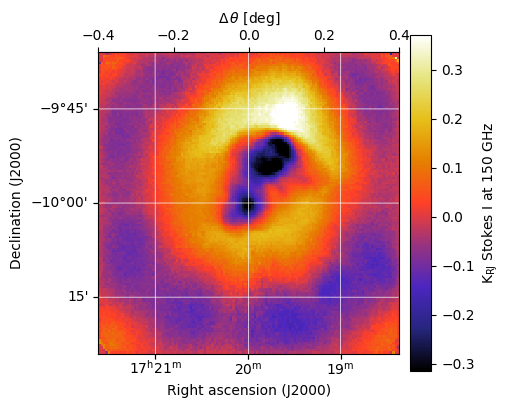

In [11]:
ml_mapper.map.plot()

that will improve more as it continues to fit.